<a href="https://colab.research.google.com/github/Arju-Jawla/Work-on-Significant-Wave-Height-data-for-2022-and-23/blob/main/SWH(22_23)_05_daymax_to_monmax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Importing Required Libraries

In [1]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

## 2. Loading the data

In [2]:
# Open the daily mean NetCDF dataset
ds_daily = xr.open_dataset('/content/drive/MyDrive/Project Learnings/Data/Reanalysis_swsh_daily_max_22_23.nc')

In [3]:
# Check the dataset to confirm it is loaded correctly
print(ds_daily)

<xarray.Dataset> Size: 759MB
Dimensions:     (valid_time: 730, latitude: 361, longitude: 720)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 6kB 2022-01-01 ... 2023-12-31
  * longitude   (longitude) float64 6kB 0.0 0.5 1.0 1.5 ... 358.5 359.0 359.5
  * latitude    (latitude) float64 3kB 90.0 89.5 89.0 88.5 ... -89.0 -89.5 -90.0
    number      int32 4B ...
Data variables:
    swh         (valid_time, latitude, longitude) float32 759MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-11-07T06:55 GRIB to CDM+CF via cfgrib-0.9.1...


## 3. Daily max to monthly max using resamppling method

In [6]:
# Resample to monthly data
ds_monthly_max = ds_daily.resample(valid_time='1ME').max()

In [7]:
# Check the result
print(ds_monthly_max)

<xarray.Dataset> Size: 25MB
Dimensions:     (valid_time: 24, latitude: 361, longitude: 720)
Coordinates:
  * longitude   (longitude) float64 6kB 0.0 0.5 1.0 1.5 ... 358.5 359.0 359.5
  * latitude    (latitude) float64 3kB 90.0 89.5 89.0 88.5 ... -89.0 -89.5 -90.0
    number      int32 4B 0
  * valid_time  (valid_time) datetime64[ns] 192B 2022-01-31 ... 2023-12-31
Data variables:
    swh         (valid_time, latitude, longitude) float32 25MB nan nan ... nan
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-11-07T06:55 GRIB to CDM+CF via cfgrib-0.9.1...


### 3.1 Verify the Resampling

In [8]:
# Print new dimensions and data for verification
print(ds_monthly_max['swh'].shape)  # Check the shape

(24, 361, 720)


In [9]:
print(ds_monthly_max['swh'].isel(valid_time=0))  # Check the first month's maximum


<xarray.DataArray 'swh' (latitude: 361, longitude: 720)> Size: 1MB
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * longitude   (longitude) float64 6kB 0.0 0.5 1.0 1.5 ... 358.5 359.0 359.5
  * latitude    (latitude) float64 3kB 90.0 89.5 89.0 88.5 ... -89.0 -89.5 -90.0
    number      int32 4B 0
    valid_time  datetime64[ns] 8B 2022-01-31
Attributes: (12/32)
    GRIB_paramId:                             140229
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      259920
    GRIB_typeOfLevel:                         meanSea
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_totalNu

## 4. Save the Monthly Max Data

In [10]:
# Save the monthly maximum data to a NetCDF file
ds_monthly_max.to_netcdf('/content/drive/MyDrive/Project Learnings/Data/Reanalysis_swsh_monthly_max_22_23.nc')

## 5. Visualize the Monthly Maximum Data
### 5.1 Spatial Map for a Specific Month:

In [11]:
# Select data for the first month
first_month_max = ds_monthly_max['swh'].isel(valid_time=0)

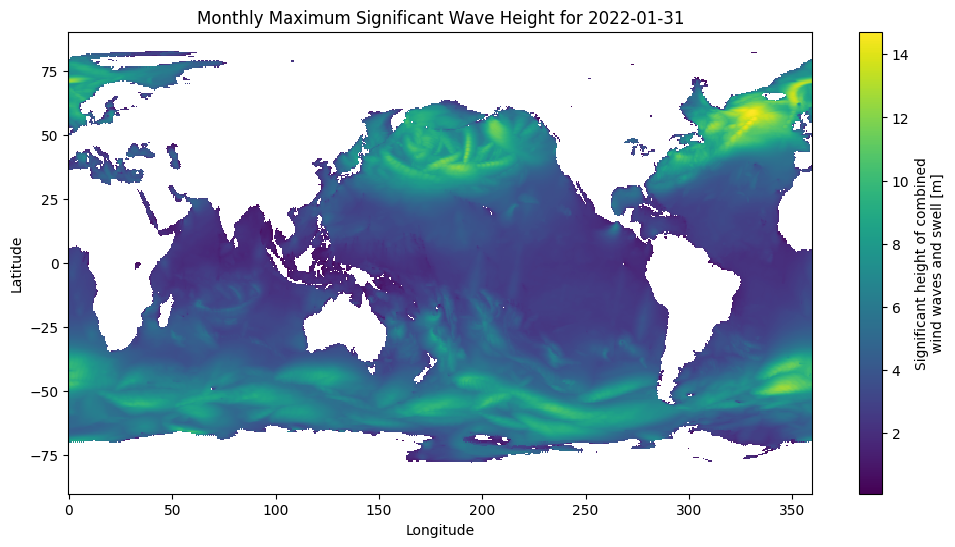

In [12]:
# Plot the data
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
first_month_max.plot(cmap='viridis', add_colorbar=True)
plt.title(f'Monthly Maximum Significant Wave Height for {str(ds_monthly_max.valid_time[0].values)[:10]}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

### 5.2 Time Series of Monthly Max for a Location:

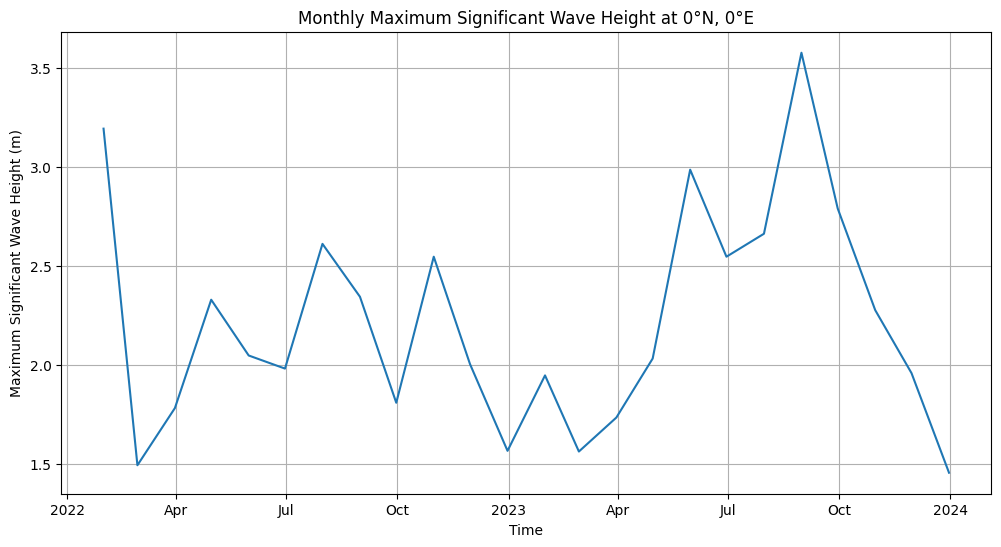

In [13]:
# Select a specific latitude and longitude (e.g., 0°N, 0°E)
specific_lat = 0
specific_lon = 0

# Extract time series at the location
swh_monthly_max_at_location = ds_monthly_max['swh'].sel(latitude=specific_lat, longitude=specific_lon, method='nearest')

# Plot the time series
swh_monthly_max_at_location.plot(figsize=(12, 6))
plt.title(f'Monthly Maximum Significant Wave Height at {specific_lat}°N, {specific_lon}°E')
plt.xlabel('Time')
plt.ylabel('Maximum Significant Wave Height (m)')
plt.grid(True)
plt.show()

### 5.3 Contour Plot

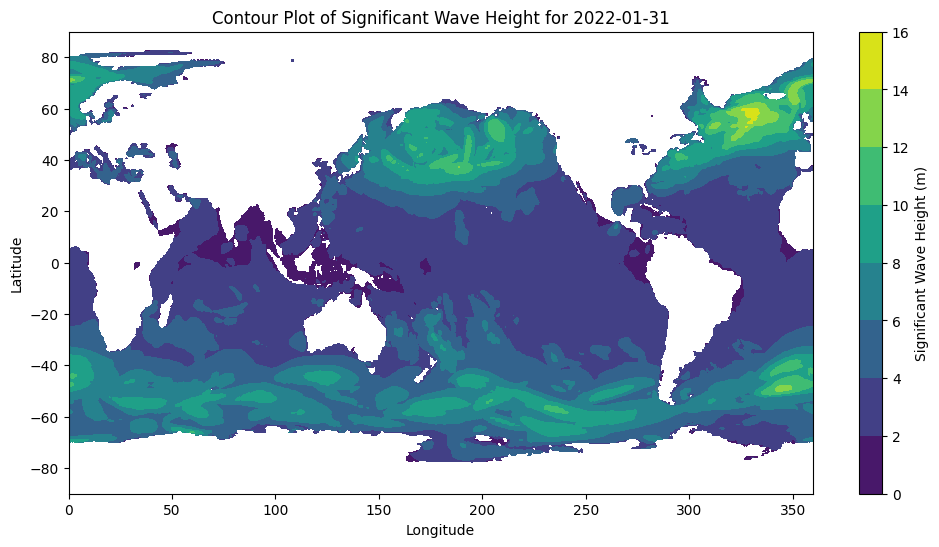

In [14]:
# Contour plot for the first month of data using contourf
plt.figure(figsize=(12, 6))
contour = plt.contourf(ds_monthly_max['longitude'], ds_monthly_max['latitude'], first_month_max.values, cmap='viridis')

# Add a colorbar
plt.colorbar(contour, label='Significant Wave Height (m)')
plt.title(f'Contour Plot of Significant Wave Height for {str(ds_monthly_max.valid_time[0].values)[:10]}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()